In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay 

In [2]:
df = pd.read_csv(r"C:\Users\jinay\OneDrive\Documents\VS Codes\Seismic Seekers\data_df.csv")
df

,Timestamp,Equipment,Category,Brand,Model,Location Type,Water Zone,Formation Type,Drilling Depth (m),Formation Pressure (bar),...,Vibration (mm/s),Operating Hours,Replaced Parts,Failure Cause,Part,Daily Rate (USD),Lead Time (days),In Stock,Failure Class,Observed Symptom
0,2024-09-14 02:20:34.926255590,Workover Rig,Rig,ReRig,WR-50,Offshore,Mid-deep,Granite,3537.670612,84.709374,...,1.016598,24,Bearing,Natural wear,Oil Filter,40000,21,True,1,Stopped working
1,2024-07-11 11:40:08.032232013,Subsea Tree,Wellhead,SubSeaHead,ST-100,Onshore,Onshore,Granite,3427.830396,116.170715,...,1.723098,20,"Valve, Filter",Leakage,Flow Control Valve,6000,14,False,1,Stopped working
2,2025-01-02 14:14:20.045196512,Accumulator Unit,Hydraulic,AccuTech,ACU-30,Offshore,Mid-shallow,Basalt,2434.679852,220.027868,...,2.983809,16,"Compressor, Heat Exchanger, Valve",Electrical failure,Flow Control Valve,2000,7,True,1,Pressure loss
3,2024-11-26 13:47:20.658413057,PDC Drill Bit,Drill Bit,BitCo,PDCX-200,Offshore,Deep,Granite,3534.910656,167.708761,...,2.335845,16,Bearing,Electrical failure,Flow Control Valve,1200,5,True,0,Abnormal vibration
4,2025-01-19 01:03:05.321608452,Travelling Block,Hoisting,BlockWorks,TB-60,Onshore,Onshore,Shale,4842.425832,283.362823,...,1.542878,16,"Heat Exchanger, Filter, Compressor",Mechanical issue,Heat Exchanger,3000,10,True,1,Lack of pressure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800731,2024-12-27 18:12:07.889674284,Land-based Rotary Rig,Rig,RigCo,LR-100,Offshore,Deep,Limestone,1401.760406,81.237383,...,2.874075,20,"Heat Exchanger, Valve",Leakage,Bearing,50000,14,True,0,Pressure loss
800732,2025-04-29 04:21:41.388133955,Well Logging Tool,Logging,LogTech,WL-10,Onshore,Onshore,Dolomite,4261.490654,306.378844,...,1.782985,22,Compressor,Electrical failure,Bearing,5000,14,True,0,Lack of pressure
800733,2024-07-21 17:25:56.794037769,Drill Collar,Drill String,DrillCo,DC-30,Offshore,Mid-deep,Soft clay,1608.439166,217.987740,...,2.251156,20,"Compressor, Heat Exchanger, Bearing",Mechanical issue,Bearing,1800,7,True,0,Pressure loss
800734,2024-07-28 15:04:09.370545852,Cement Silo,Cementing,CemenStore,CS-100,Onshore,Onshore,Limestone,3420.829925,276.495271,...,1.531628,22,"Filter, Bearing, Heat Exchanger",Mechanical issue,Heat Exchanger,700,5,True,1,Stopped working


In [3]:
df.nunique()

Timestamp                   800736
Equipment                       50
Category                        21
Brand                           48
Model                           50
Location Type                    2
Water Zone                       7
Formation Type                   7
Drilling Depth (m)          800736
Formation Pressure (bar)    800736
Mud Weight (ppg)            800736
Mud Viscosity (cP)          800736
Pump Pressure (bar)         800736
Pump Flow (L/min)           800736
ROP (m/hr)                  800736
Hook Load (t)               800736
Torque (kN·m)               800736
Maintenance Type                 2
Temperature (°C)            800736
Pressure (bar)              800736
Vibration (mm/s)            800736
Operating Hours                  9
Replaced Parts                  85
Failure Cause                    4
Part                             5
Daily Rate (USD)                31
Lead Time (days)                 8
In Stock                         2
Failure Class       

In [ ]:
clean = df['Replaced Parts'].str.replace(r',\s*', ',', regex=True)

dummies = clean.str.get_dummies(sep=',')

dummies.columns = dummies.columns.str.strip()

df_with_flags = pd.concat([df, dummies], axis=1)

print(df_with_flags.head())

                       Timestamp         Equipment   Category       Brand  \
0  2024-09-14 02:20:34.926255590      Workover Rig        Rig       ReRig   
1  2024-07-11 11:40:08.032232013       Subsea Tree   Wellhead  SubSeaHead   
2  2025-01-02 14:14:20.045196512  Accumulator Unit  Hydraulic    AccuTech   
3  2024-11-26 13:47:20.658413057     PDC Drill Bit  Drill Bit       BitCo   
4  2025-01-19 01:03:05.321608452  Travelling Block   Hoisting  BlockWorks   

      Model Location Type   Water Zone Formation Type  Drilling Depth (m)  \
0     WR-50      Offshore     Mid-deep        Granite         3537.670612   
1    ST-100       Onshore      Onshore        Granite         3427.830396   
2    ACU-30      Offshore  Mid-shallow         Basalt         2434.679852   
3  PDCX-200      Offshore         Deep        Granite         3534.910656   
4     TB-60       Onshore      Onshore          Shale         4842.425832   

   Formation Pressure (bar)  ...  Daily Rate (USD)  Lead Time (days)  \
0 

In [5]:
df_with_flags.drop(columns={'Replaced Parts'}, axis=1, inplace=True)
df_with_flags.isnull().sum()

Timestamp                   0
Equipment                   0
Category                    0
Brand                       0
Model                       0
Location Type               0
Water Zone                  0
Formation Type              0
Drilling Depth (m)          0
Formation Pressure (bar)    0
Mud Weight (ppg)            0
Mud Viscosity (cP)          0
Pump Pressure (bar)         0
Pump Flow (L/min)           0
ROP (m/hr)                  0
Hook Load (t)               0
Torque (kN·m)               0
Maintenance Type            0
Temperature (°C)            0
Pressure (bar)              0
Vibration (mm/s)            0
Operating Hours             0
Failure Cause               0
Part                        0
Daily Rate (USD)            0
Lead Time (days)            0
In Stock                    0
Failure Class               0
Observed Symptom            0
Bearing                     0
Compressor                  0
Filter                      0
Heat Exchanger              0
Valve     

In [6]:
print(df_with_flags.dtypes)

Timestamp                    object
Equipment                    object
Category                     object
Brand                        object
Model                        object
Location Type                object
Water Zone                   object
Formation Type               object
Drilling Depth (m)          float64
Formation Pressure (bar)    float64
Mud Weight (ppg)            float64
Mud Viscosity (cP)          float64
Pump Pressure (bar)         float64
Pump Flow (L/min)           float64
ROP (m/hr)                  float64
Hook Load (t)               float64
Torque (kN·m)               float64
Maintenance Type             object
Temperature (°C)            float64
Pressure (bar)              float64
Vibration (mm/s)            float64
Operating Hours               int64
Failure Cause                object
Part                         object
Daily Rate (USD)              int64
Lead Time (days)              int64
In Stock                       bool
Failure Class               

In [7]:
cols = df_with_flags.select_dtypes(include='object').columns
cols

Index(['Timestamp', 'Equipment', 'Category', 'Brand', 'Model', 'Location Type',
       'Water Zone', 'Formation Type', 'Maintenance Type', 'Failure Cause',
       'Part', 'Observed Symptom'],
      dtype='object')

In [8]:
le = LabelEncoder()

for i in cols:
    df_with_flags[i] = le.fit_transform(df_with_flags[i])
    
print(df_with_flags.dtypes)

Timestamp                     int32
Equipment                     int32
Category                      int32
Brand                         int32
Model                         int32
Location Type                 int32
Water Zone                    int32
Formation Type                int32
Drilling Depth (m)          float64
Formation Pressure (bar)    float64
Mud Weight (ppg)            float64
Mud Viscosity (cP)          float64
Pump Pressure (bar)         float64
Pump Flow (L/min)           float64
ROP (m/hr)                  float64
Hook Load (t)               float64
Torque (kN·m)               float64
Maintenance Type              int32
Temperature (°C)            float64
Pressure (bar)              float64
Vibration (mm/s)            float64
Operating Hours               int64
Failure Cause                 int32
Part                          int32
Daily Rate (USD)              int64
Lead Time (days)              int64
In Stock                       bool
Failure Class               

In [9]:
df_with_flags.drop('Timestamp', axis=1, inplace=True)

corr = df_with_flags.corr()
corr['Failure Class']

Equipment                   0.004106
Category                   -0.007304
Brand                       0.002790
Model                       0.006724
Location Type               0.001376
Water Zone                  0.001472
Formation Type             -0.011127
Drilling Depth (m)          0.112877
Formation Pressure (bar)    0.065413
Mud Weight (ppg)            0.011197
Mud Viscosity (cP)          0.035250
Pump Pressure (bar)         0.047870
Pump Flow (L/min)          -0.001113
ROP (m/hr)                  0.039554
Hook Load (t)               0.033730
Torque (kN·m)               0.062192
Maintenance Type           -0.075246
Temperature (°C)            0.062324
Pressure (bar)             -0.030387
Vibration (mm/s)            0.048197
Operating Hours             0.044500
Failure Cause              -0.066820
Part                        0.000214
Daily Rate (USD)           -0.040741
Lead Time (days)           -0.034689
In Stock                    0.007821
Failure Class               1.000000
O

In [10]:
df_with_flags.skew()

Equipment                   0.007852
Category                   -0.390281
Brand                      -0.015799
Model                       0.006520
Location Type               0.001374
Water Zone                 -0.560556
Formation Type              0.009250
Drilling Depth (m)          0.057485
Formation Pressure (bar)    0.035181
Mud Weight (ppg)            0.005898
Mud Viscosity (cP)          0.009118
Pump Pressure (bar)         0.021270
Pump Flow (L/min)          -0.001633
ROP (m/hr)                  0.014789
Hook Load (t)               0.008655
Torque (kN·m)               0.024283
Maintenance Type           -0.058606
Temperature (°C)            0.030136
Pressure (bar)             -0.005368
Vibration (mm/s)            0.019219
Operating Hours             0.019613
Failure Cause              -0.041128
Part                       -0.000211
Daily Rate (USD)            3.040976
Lead Time (days)            0.950719
In Stock                   -2.333047
Failure Class               0.000000
O

In [11]:
Features = df_with_flags.drop(columns={'Failure Class'}, axis=1)
Labels = df_with_flags['Failure Class']

features_train, features_test, labels_train, labels_test = train_test_split(Features, Labels, test_size=0.2, random_state=42)

c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:36:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training CV F1: 0.637 ± 0.001

Test set classification report:
              precision    recall  f1-score   support

           0      0.643     0.737     0.687     80340
           1      0.690     0.589     0.635     79808

    accuracy                          0.663    160148
   macro avg      0.666     0.663     0.661    160148
weighted avg      0.666     0.663     0.661    160148



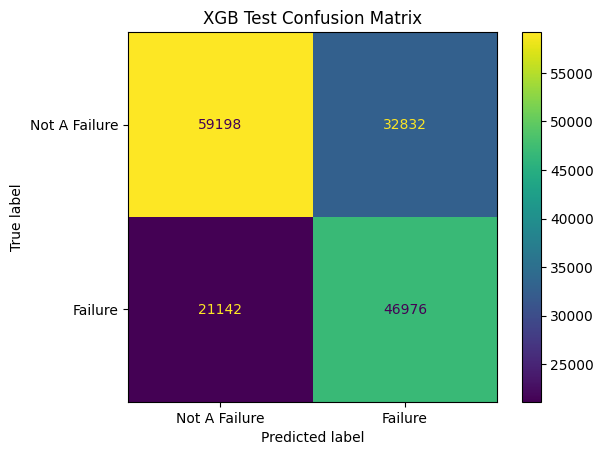

In [ ]:
best_xgb = XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'
    )

best_xgb.fit(features_train, labels_train)
train_pred = best_xgb.predict(features_test)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_xgb, features_train, labels_train, cv=cv, scoring='f1', n_jobs=-1)
print(f"Training CV F1: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

y_pred = best_xgb.predict(features_test)
print("\nTest set classification report:")
print(classification_report(labels_test, y_pred, digits=3))

fig, ax = plt.subplots()
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(train_pred,labels_test), display_labels=['Not A Failure', 'Failure']).plot(ax=ax)
ax.set_title("XGB Test Confusion Matrix")
plt.show()

In [14]:
best_xgb.save_model("best_xgb.json")